<a href="https://colab.research.google.com/github/neel26desai/cmpe255_clustering/blob/main/GaussianMixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=1, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [3]:
import matplotlib.pyplot as plt

Working with Circular data. Generalized GMM

In [ ]:
# Using GMM as KMeans (without using the proabilistic nature of GMM)

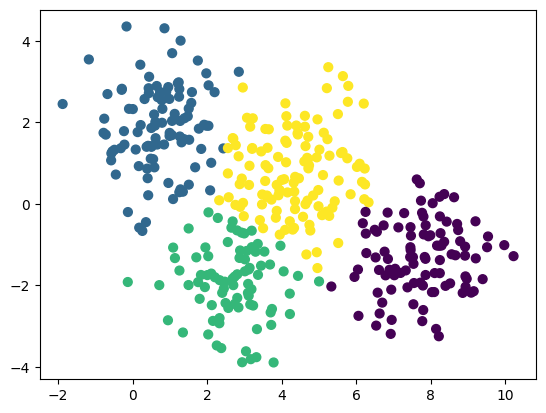

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [5]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [6]:
#finding the cluster quality
silhouette_avg = silhouette_score(X, labels)
print("The average silhouette_score is :", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("The Calinski-Harabasz Index is :", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, labels)
print("The Davies-Bouldin Index is :", davies_bouldin)

The average silhouette_score is : 0.5009113634547666
The Calinski-Harabasz Index is : 656.9292490642748
The Davies-Bouldin Index is : 0.6902154713532165


In [7]:
#Using the probabilistic model for GMM
probs = gmm.predict_proba(X)
print(probs[:5].round(3))


[[0.002 0.    0.    0.998]
 [0.    0.    1.    0.   ]
 [0.    0.    0.999 0.001]
 [0.    0.    0.016 0.984]
 [0.    0.    0.999 0.001]]


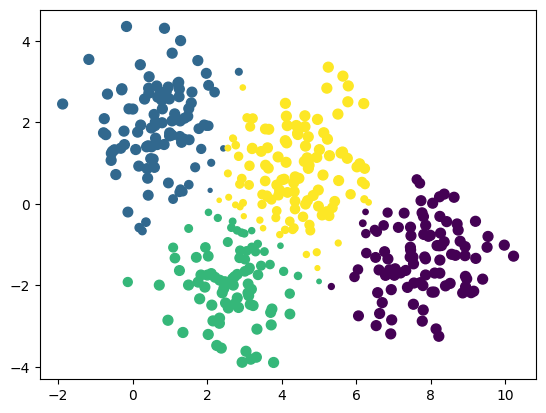

In [8]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [9]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

<ipython-input-9-72694608e0cc>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


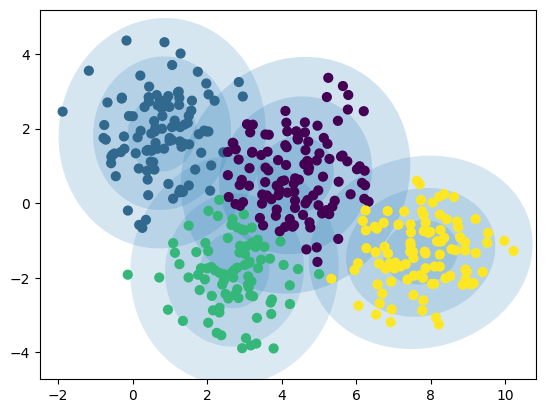

In [10]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

Working with ellongated data

In [11]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

<ipython-input-9-72694608e0cc>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


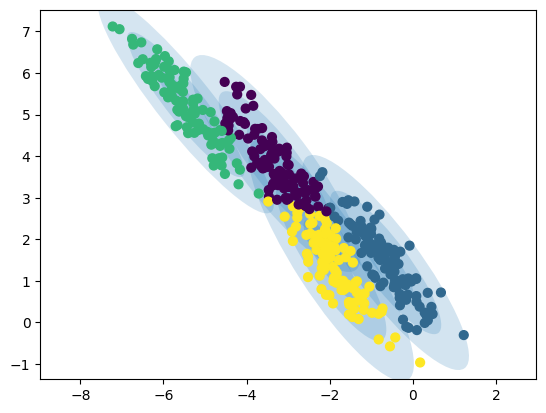

In [12]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

GMM as density Estimators

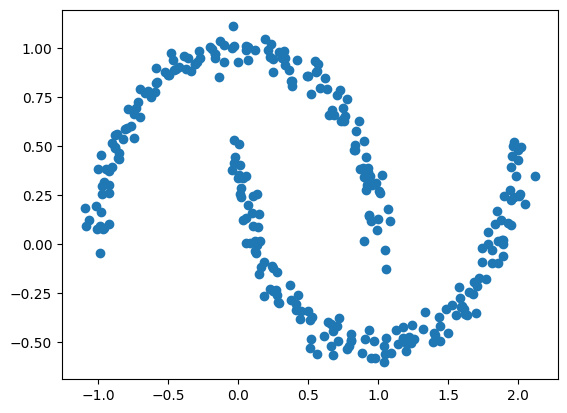

In [15]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(300, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

<ipython-input-9-72694608e0cc>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


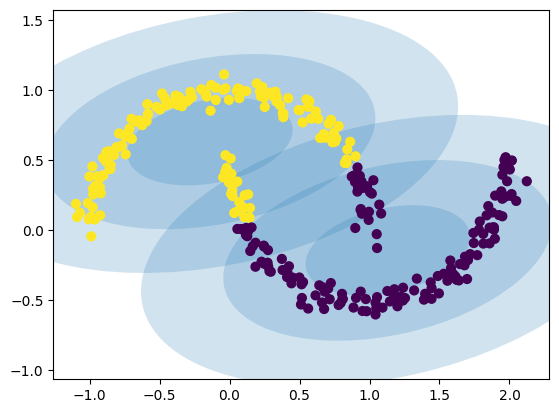

In [16]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

As we have used only 2 components we see that one of overlapping arc points are not clustered properly. However if we in crease the number of compents we night be able to resolve the problem

<ipython-input-9-72694608e0cc>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


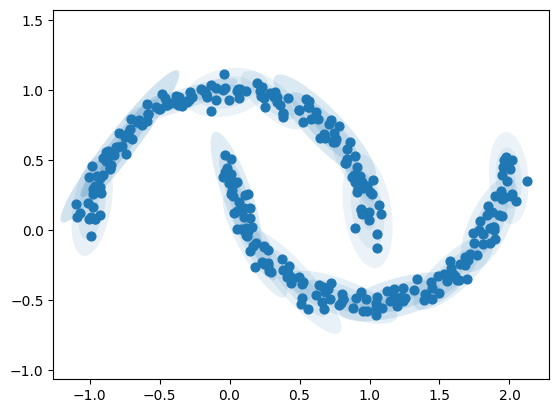

In [17]:
gmm3 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm3, Xmoon, label=False)

Here the mixture of 16 Gaussian components serves not to find separated clusters of data, but rather to model the overall *distribution* of the input data.
This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input.
For example, here are 400 new points drawn from this 16-component GMM fit to our original data (see the following figure):